In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Define a complex probability distribution (gold map)
def target_distribution(x):
    """A bimodal distribution with two peaks (gold mines)."""
    return np.exp(-0.5 * ((x - 3) ** 2)) + np.exp(-0.5 * ((x + 3) ** 2))

# Metropolis-Hastings Algorithm
def metropolis_hastings(target, num_samples=5000, proposal_std=1.0):
    samples = []
    current_x = np.random.randn()  # Start at a random position

    for _ in range(num_samples):
        proposal_x = current_x + np.random.normal(0, proposal_std)  # Propose a move
        
        # Compute acceptance probability
        acceptance_ratio = target(proposal_x) / target(current_x)
        
        # Accept or reject the move
        if np.random.rand() < acceptance_ratio:
            current_x = proposal_x  # Accept move
        
        samples.append(current_x)  # Store the sample
    
    return np.array(samples)

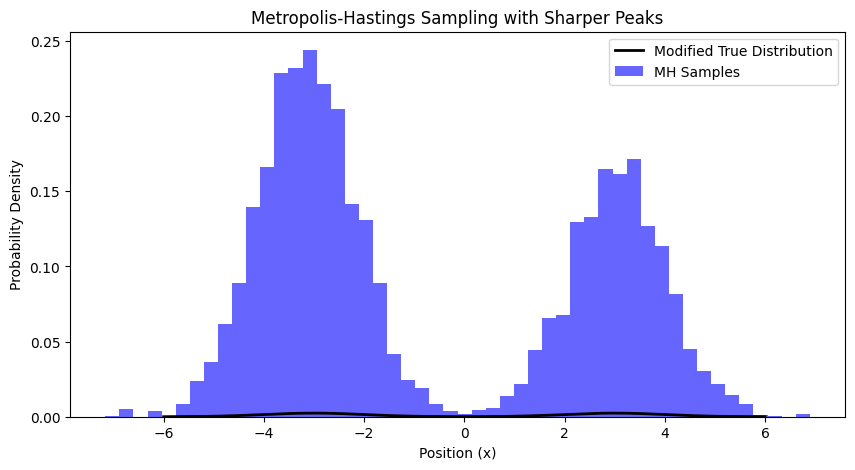

In [ ]:
# Run Metropolis-Hastings again with the modified distribution
modified_samples = metropolis_hastings(target_distribution, num_samples=5000, proposal_std=1.0)

# Plot the results
x_vals = np.linspace(-6, 6, 1000)
y_vals = target_distribution(x_vals)

plt.figure(figsize=(10, 5))

# Plot the new true distribution with sharper peaks
plt.plot(x_vals, y_vals / np.sum(y_vals), label="Modified True Distribution", color='black', linewidth=2)

# Plot histogram of new samples
plt.hist(modified_samples, bins=50, density=True, alpha=0.6, color='blue', label="MH Samples")

plt.xlabel("Position (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Metropolis-Hastings Sampling with Sharper Peaks")
plt.show()